# Credit Scoring

In this activity, you will use a deep learning model to predict the credit scores of borrowers using alternative data.

## Instructions

Fintech opportunities in emerging economies are extremely large. There are billions of new consumers, with access to a digital wallet, who have a desire to get a lower interest rate loan. The trouble is, most of them don't have a credit score.

An alternative data firm is therefore collecting data on emerging market consumers, from utility bills, to industry worked, to even responses to online surveys about good money habits. They've provided you this data, in order to build a model which can be use all of this information to provide a usable credit score for anyone interested in applying for a loan.

The dataset contains `68` encoded features (columns from `0` to `67`), with all personal identifying information removed. The last two columns of the dataset (columns `68` and `69`) are preliminary credit score quality indicators that have been manually assigned by staff at the firm. (The firm thinks that if a model can be built for this labeled data, it can then be used to automatically make credit predictions about customers it hasn't gone through this labelling process with).

1. Create a shallow (`1` hidden layer) and deep neural network (with two layers) to predict the geographical coordinates of the compositions represented in the data. Decide on your own how many neurons you will use on each hidden layer.

2. Fit each model with at least `800` epochs, and setting `validation_split=0.3`.

3. Compare the loss metrics for the two models.

4. Compare train (loss) and test (val_loss) metrics for both models, and look for signs of overfitting.

## Hint

* Note that that there needs to be two regression outputs. Your model structure should reflect this.

* When fitting the model, you can set the parameter `verbose=0` in the `fit()` method to mute the printing of each epoch's results.


In [1]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Upload credit_scores.csv to Colab
from google.colab import files

csv_file = files.upload()

Saving credit_scores.csv to credit_scores.csv


In [3]:
# Read in data
df = pd.read_csv("credit_scores.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


## Prepare the data

In [4]:
# Create the features set (X) and the target set (y)

# The features dataset consists of columns 0 to 67
X = df.iloc[:, 0:68]

# The target consists of columns 68 and 69
y = df.iloc[:, 68:70]

# View data for the features set
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783


In [5]:
# Scale the data of the features set using the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Create a shallow (`1` hidden layer) neural network to predict the credit score data. Decide on your own how many neurons you will use on each hidden layer.

In [6]:
# Create a shallow, 1 hidden layer, neural network

# Instantiate an instance of the Sequential model
nn = Sequential()

# Create 1 hidden layer
nn.add(Dense(units=8, input_dim=68, activation="relu"))

# Create the output layer
nn.add(Dense(units=2, activation="linear"))

# Compile the model 
# Set the parameters as mean_squared_error, adam, and mse.
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

## Step 2. Fit each model with at least `800` epochs, and setting `validation_split=0.3`.

In [7]:
# Fit the model
# The validation split parameter splits the data into testing and training sets.
model_1 = nn.fit(X, y, validation_split=0.3, epochs=800, verbose=0)

## Create a deep neural network (with two layers) to predict the credit score data. Decide on your own how many neurons you will use on each hidden layer.

In [8]:
# Create a deep neural network with 2 hidden layers

# Instantiate an instance of the Sequential model
dnn = Sequential()

# Create the first hidden layer
dnn.add(Dense(units=8, input_dim=68, activation="relu"))

# Create the second hidden layer
dnn.add(Dense(units=8, activation="relu"))

# Create the Output layer
dnn.add(Dense(units=2, activation="linear"))

# Compile the model 
# Set the parameters as mean_squared_error, adam, and mse.
dnn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

## Step 2. Fit each model with at least `800` epochs, and setting `validation_split=0.3`.

In [9]:
# Fit the model
model_2 = dnn.fit(X, y, validation_split=0.3, epochs=800, verbose=0)

# Evaluate the models

## Step 3: Compare the loss metrics for the two models.

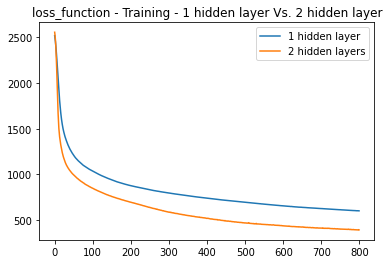

In [10]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer Vs. 2 hidden layer")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

## Step 4: Compare train (loss) and test (val_loss) metrics for both models, and look for signs of overfitting.

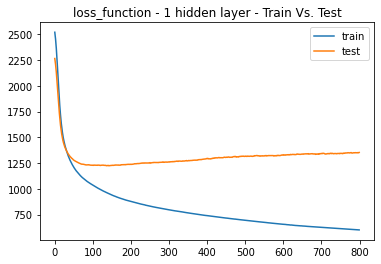

In [11]:
# Plot train vs test for the shallow neural net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

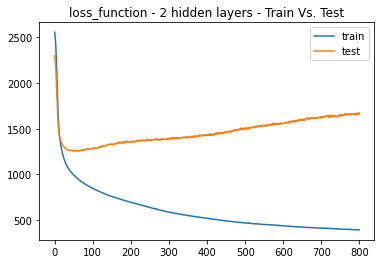

In [12]:
# Plot train vs test for the deep neural net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - 2 hidden layers - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()